In [1]:
# import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Build optimized model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),  # Regularization to prevent overfitting
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train and save the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.save("mnist_cnn_model.h5")


C:\Users\harsh\anaconda3\envs\MLEnv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 32ms/step - accuracy: 0.9012 - loss: 0.3345 - val_accuracy: 0.9837 - val_loss: 0.0522
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9759 - loss: 0.0827 - val_accuracy: 0.9863 - val_loss: 0.0430
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9833 - loss: 0.0578 - val_accuracy: 0.9876 - val_loss: 0.0465
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9852 - loss: 0.0525 - val_accuracy: 0.9898 - val_loss: 0.0346
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9882 - loss: 0.0418 - val_accuracy: 0.9900 - val_loss: 0.0390


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,872 (2.58 MB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 450,454 (1.72 MB)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, GaussianNoise
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
)
from tensorflow.keras.datasets import mnist
import numpy as np

# 1) Load & preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype("float32") / 255.0
x_test  = x_test.reshape(-1,28,28,1).astype("float32") / 255.0

# 2) Data Augmentation pipeline
aug = ImageDataGenerator(
    rotation_range=10,       # random rotations
    width_shift_range=0.1,   # horizontal shifts
    height_shift_range=0.1,  # vertical shifts
    zoom_range=0.1,          # zoom in/out
    shear_range=0.1,         # shearing
    horizontal_flip=False    # no horizontal flips for digits
)
aug.fit(x_train)

# 3) Build a deeper CNN with noise, batchnorm, and dropout
model = Sequential([
    GaussianNoise(0.1, input_shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 4) Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-5,
        verbose=1
    ),
    ModelCheckpoint(
        'best_mnist_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# 5) Train with augmentation (fixed steps_per_epoch as int)
batch_size = 128
epochs = 30

history = model.fit(
    aug.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test),
    steps_per_epoch=int(np.ceil(len(x_train) / batch_size)),
    epochs=epochs,
    callbacks=callbacks,
    verbose=2
)

# 6) Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

# 7) Save final model
model.save("mnist_cnn_model_augmented.h5")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gaussian_noise_1 (GaussianNoise)     │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 872,426 (3.33 MB)

 Trainable params: 871,530 (3.32 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.86780, saving model to best_mnist_model.h5


469/469 - 152s - 324ms/step - accuracy: 0.8949 - loss: 0.3453 - val_accuracy: 0.8678 - val_loss: 0.3314 - learning_rate: 1.0000e-03
Epoch 2/30

Epoch 2: val_accuracy improved from 0.86780 to 0.98990, saving model to best_mnist_model.h5


469/469 - 146s - 310ms/step - accuracy: 0.9667 - loss: 0.1077 - val_accuracy: 0.9899 - val_loss: 0.0308 - learning_rate: 1.0000e-03
Epoch 3/30

Epoch 3: val_accuracy did not improve from 0.98990
469/469 - 145s - 310ms/step - accuracy: 0.9740 - loss: 0.0845 - val_accuracy: 0.9890 - val_loss: 0.0306 - learning_rate: 1.0000e-03
Epoch 4/30

Epoch 4: val_accuracy improved from 0.98990 to 0.99250, saving model to best_mnist_model.h5


469/469 - 145s - 309ms/step - accuracy: 0.9786 - loss: 0.0684 - val_accuracy: 0.9925 - val_loss: 0.0230 - learning_rate: 1.0000e-03
Epoch 5/30

Epoch 5: val_accuracy improved from 0.99250 to 0.99260, saving model to best_mnist_model.h5


469/469 - 145s - 310ms/step - accuracy: 0.9807 - loss: 0.0643 - val_accuracy: 0.9926 - val_loss: 0.0233 - learning_rate: 1.0000e-03
Epoch 6/30

Epoch 6: val_accuracy did not improve from 0.99260
469/469 - 145s - 309ms/step - accuracy: 0.9826 - loss: 0.0564 - val_accuracy: 0.9911 - val_loss: 0.0242 - learning_rate: 1.0000e-03
Epoch 7/30

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 7: val_accuracy improved from 0.99260 to 0.99270, saving model to best_mnist_model.h5


469/469 - 145s - 310ms/step - accuracy: 0.9836 - loss: 0.0528 - val_accuracy: 0.9927 - val_loss: 0.0235 - learning_rate: 1.0000e-03
Epoch 8/30

Epoch 8: val_accuracy improved from 0.99270 to 0.99530, saving model to best_mnist_model.h5


469/469 - 145s - 310ms/step - accuracy: 0.9869 - loss: 0.0415 - val_accuracy: 0.9953 - val_loss: 0.0141 - learning_rate: 5.0000e-04
Epoch 9/30

Epoch 9: val_accuracy did not improve from 0.99530
469/469 - 146s - 311ms/step - accuracy: 0.9872 - loss: 0.0406 - val_accuracy: 0.9952 - val_loss: 0.0146 - learning_rate: 5.0000e-04
Epoch 10/30

Epoch 10: val_accuracy did not improve from 0.99530
469/469 - 144s - 306ms/step - accuracy: 0.9882 - loss: 0.0392 - val_accuracy: 0.9952 - val_loss: 0.0138 - learning_rate: 5.0000e-04
Epoch 11/30

Epoch 11: val_accuracy improved from 0.99530 to 0.99610, saving model to best_mnist_model.h5


469/469 - 137s - 292ms/step - accuracy: 0.9890 - loss: 0.0370 - val_accuracy: 0.9961 - val_loss: 0.0109 - learning_rate: 5.0000e-04
Epoch 12/30

Epoch 12: val_accuracy did not improve from 0.99610
469/469 - 128s - 272ms/step - accuracy: 0.9894 - loss: 0.0351 - val_accuracy: 0.9957 - val_loss: 0.0132 - learning_rate: 5.0000e-04
Epoch 13/30

Epoch 13: val_accuracy did not improve from 0.99610
469/469 - 140s - 298ms/step - accuracy: 0.9893 - loss: 0.0352 - val_accuracy: 0.9958 - val_loss: 0.0136 - learning_rate: 5.0000e-04
Epoch 14/30

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 14: val_accuracy did not improve from 0.99610
469/469 - 144s - 308ms/step - accuracy: 0.9893 - loss: 0.0339 - val_accuracy: 0.9949 - val_loss: 0.0145 - learning_rate: 5.0000e-04
Epoch 15/30

Epoch 15: val_accuracy did not improve from 0.99610
469/469 - 136s - 291ms/step - accuracy: 0.9905 - loss: 0.0305 - val_accuracy: 0.9957 - val_loss: 0.0140 - learning_rate: 2.5000e-04
Ep


Test accuracy: 0.9961


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step


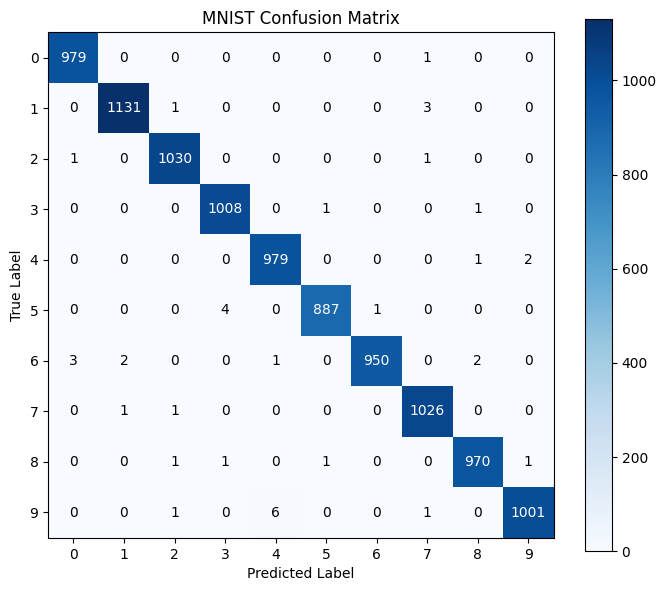

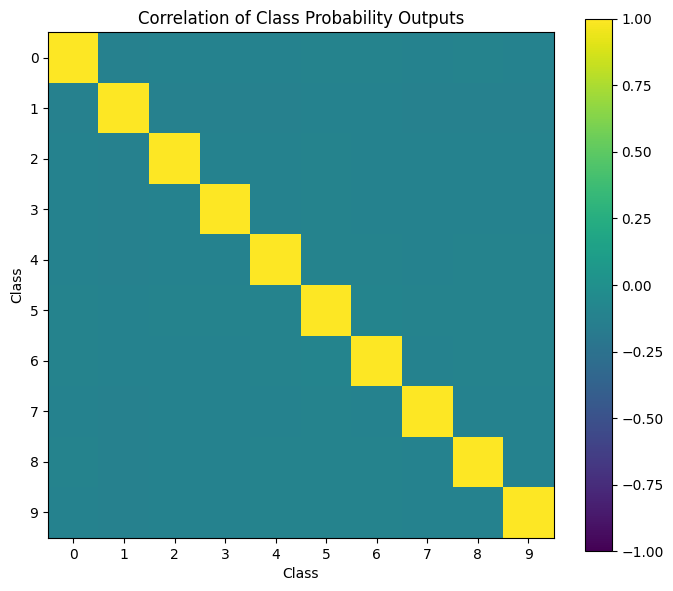

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import itertools

# Load model and test data
model = load_model("best_mnist_model.h5")
(_, _), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(-1,28,28,1).astype("float32") / 255.0

# Predict probabilities & classes
probs = model.predict(x_test, batch_size=256)
preds = np.argmax(probs, axis=1)

# 1) Confusion matrix
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(7,6))
plt.imshow(cm, cmap='Blues')
plt.title("MNIST Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.colorbar()
ticks = np.arange(10)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
thresh = cm.max()/2
for i, j in itertools.product(range(10), range(10)):
    plt.text(j, i, cm[i,j],
             ha="center", va="center",
             color="white" if cm[i,j]>thresh else "black")
plt.tight_layout()
plt.show()

# 2) Correlation matrix of predicted probabilities
corr = np.corrcoef(probs, rowvar=False)

plt.figure(figsize=(7,6))
plt.imshow(corr, cmap='viridis', vmin=-1, vmax=1)
plt.title("Correlation of Class Probability Outputs")
plt.xlabel("Class")
plt.ylabel("Class")
plt.colorbar()
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.tight_layout()
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0     0.9959    0.9990    0.9975       980
           1     0.9974    0.9965    0.9969      1135
           2     0.9961    0.9981    0.9971      1032
           3     0.9951    0.9980    0.9965      1010
           4     0.9929    0.9969    0.9949       982
           5     0.9978    0.9944    0.9961       892
           6     0.9989    0.9916    0.9953       958
           7     0.9942    0.9981    0.9961      1028
           8     0.9959    0.9959    0.9959       974
           9     0.9970    0.9921    0.9945      1009

    accuracy                         0.9961     10000
   macro avg     0.9961    0.9961    0.9961     10000
weighted avg     0.9961    0.9961    0.9961     10000

Macro-average precision (AP): 0.9999


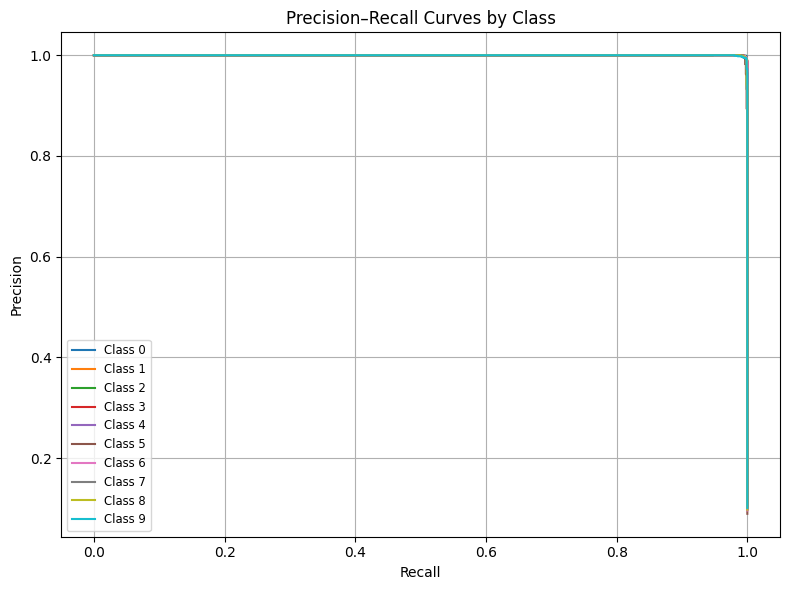

In [5]:
from sklearn.metrics import (
    classification_report,
    precision_recall_curve,
    average_precision_score
)
import matplotlib.pyplot as plt

# Assuming y_test, preds, and probs are already defined:
#   y_test: true labels (shape [n_samples])
#   preds:  predicted labels (shape [n_samples])
#   probs:  predicted probabilities (shape [n_samples, n_classes])

# 1) Classification report (precision, recall, f1, support per class)
report = classification_report(y_test, preds, digits=4)
print("Classification Report:\n", report)

# 2) Macro- and micro-averaged metrics
#    (you can extract these from the report or compute directly)
#    Here’s how to compute overall average precision:
avg_precision = average_precision_score(
    y_test, probs, average="macro"
)
print(f"Macro-average precision (AP): {avg_precision:.4f}")

# 3) Precision–Recall curve for each class
plt.figure(figsize=(8, 6))
for cls in range(probs.shape[1]):
    precision, recall, _ = precision_recall_curve(
        (y_test == cls).astype(int),
        probs[:, cls]
    )
    plt.plot(recall, precision, label=f"Class {cls}")
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves by Class")
plt.legend(loc="lower left", fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()
